In [2]:
#data loading
import pandas as pd
filename="/content/HealthInsurance.csv"
a=pd.read_csv(str(filename))

print(a)

      rownames health  age limit  gender insurance married selfemp  family  \
0            1    yes   31    no    male       yes     yes     yes       4   
1            2    yes   31    no  female       yes     yes      no       4   
2            3    yes   54    no    male       yes     yes      no       5   
3            4    yes   27    no    male       yes      no      no       5   
4            5    yes   39    no    male       yes     yes      no       5   
...        ...    ...  ...   ...     ...       ...     ...     ...     ...   
8797      8798    yes   46    no  female       yes     yes      no       3   
8798      8799    yes   50    no    male       yes     yes      no       3   
8799      8800    yes   27    no    male       yes     yes      no       2   
8800      8801    yes   27    no  female       yes     yes      no       2   
8801      8802    yes   35    no    male       yes     yes      no       4   

         region ethnicity   education  
0         south      ca

In [3]:
##Checking for null values
a.isna().sum()

,0
rownames,0
health,0
age,0
limit,0
gender,0
insurance,0
married,0
selfemp,0
family,0
region,0


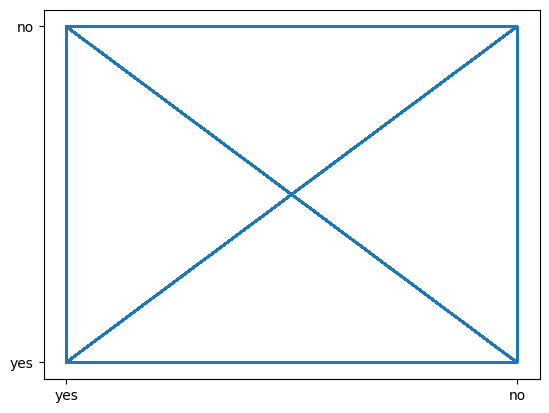

In [4]:
from matplotlib import pyplot as plt
target="insurance"
index=1
plt.plot(a[a.columns[index]],a[str(target)])

<BarContainer object of 8802 artists>

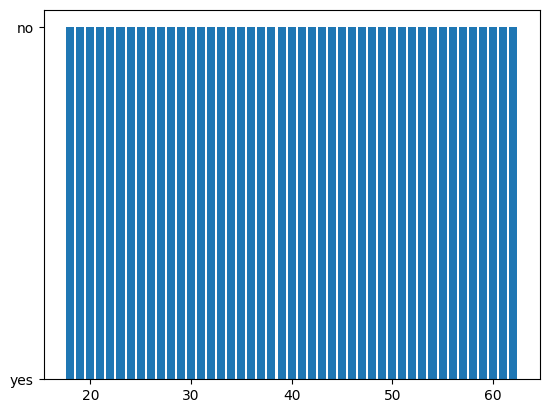

In [5]:
plt.bar(a[a.columns[2]],a[str(target)])

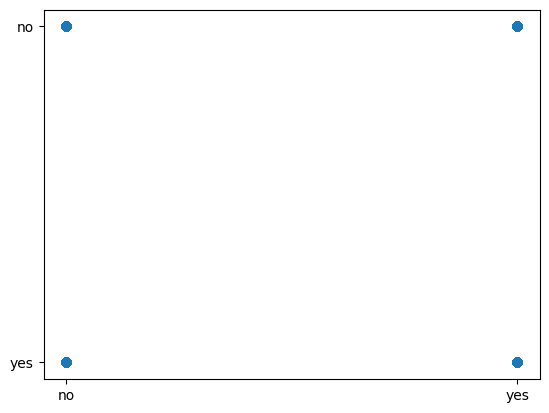

In [6]:
plt.scatter(a[a.columns[3]], a[str(target)])

In [13]:
from sklearn.preprocessing import LabelEncoder
import numpy as np
b=LabelEncoder()


#transform string into int
transformColumns={1,3,4,5,6,7,9,10,11}
for x in transformColumns:
    a[a.columns[x]]=b.fit_transform(a[a.columns[x]])

print(a)

      rownames  health  age  limit  gender  insurance  married  selfemp  \
0            1       1   31      0       1          1        1        1   
1            2       1   31      0       0          1        1        0   
2            3       1   54      0       1          1        1        0   
3            4       1   27      0       1          1        0        0   
4            5       1   39      0       1          1        1        0   
...        ...     ...  ...    ...     ...        ...      ...      ...   
8797      8798       1   46      0       0          1        1        0   
8798      8799       1   50      0       1          1        1        0   
8799      8800       1   27      0       1          1        1        0   
8800      8801       1   27      0       0          1        1        0   
8801      8802       1   35      0       1          1        1        0   

      family  region  ethnicity  education  
0          4       2          1          0  
1        

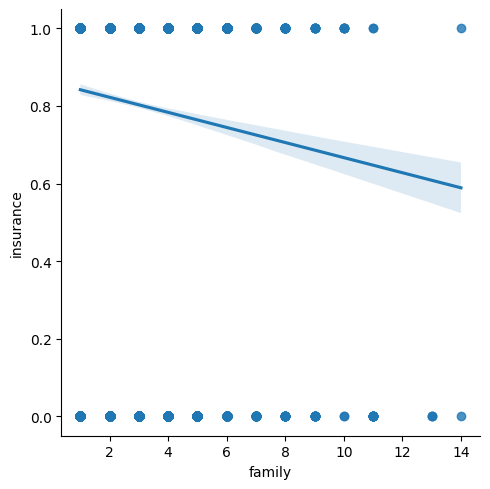

In [14]:
import seaborn as sns
#a["family"] = pd.to_numeric(a["family"])
#a["parttime"] = pd.to_numeric(a["parttime"])
sns.lmplot(x="family",y=str(target),data=a)

<Axes: xlabel='insurance', ylabel='insurance'>

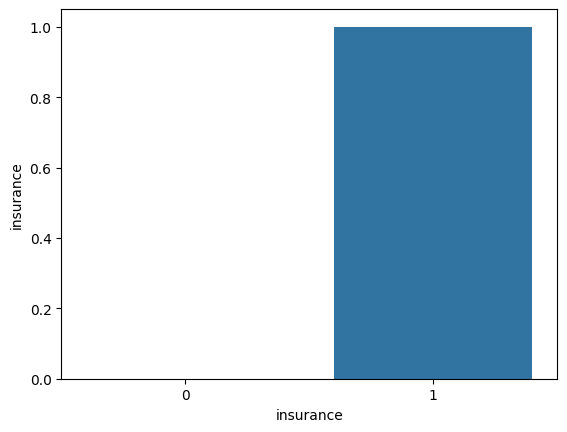

In [15]:
sns.barplot(x=a.columns[5],y=str(target),data=a)

<Axes: xlabel='health', ylabel='insurance'>

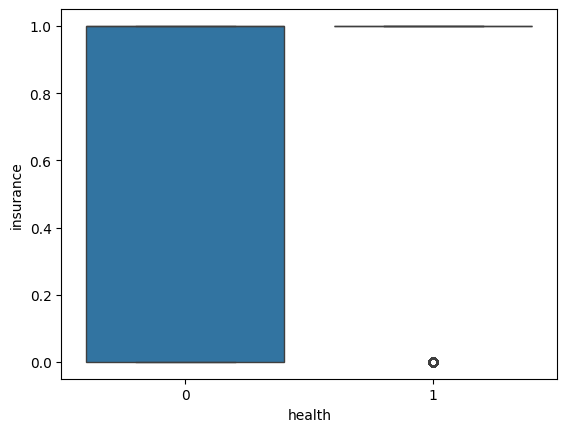

In [16]:
sns.boxplot(x=a.columns[1],y=str(target),data=a)

<ipython-input-17-61a72522baee>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a[str(target)])


<Axes: xlabel='insurance', ylabel='Density'>

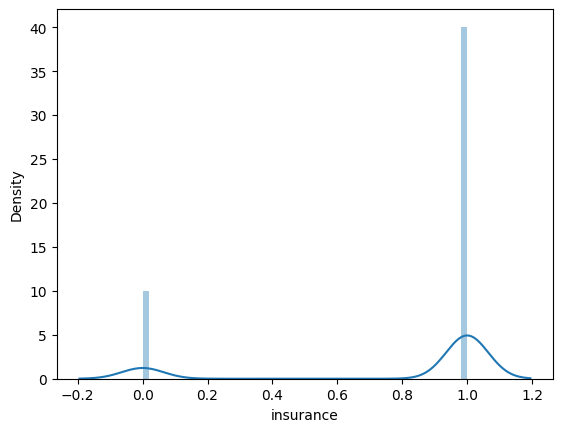

In [17]:
sns.distplot(a[str(target)])

<Axes: xlabel='health', ylabel='Density'>

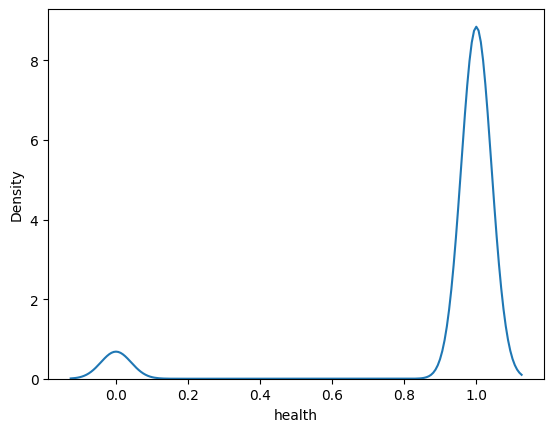

In [18]:
sns.kdeplot(a[a.columns[1]])

<Axes: xlabel='age', ylabel='Density'>

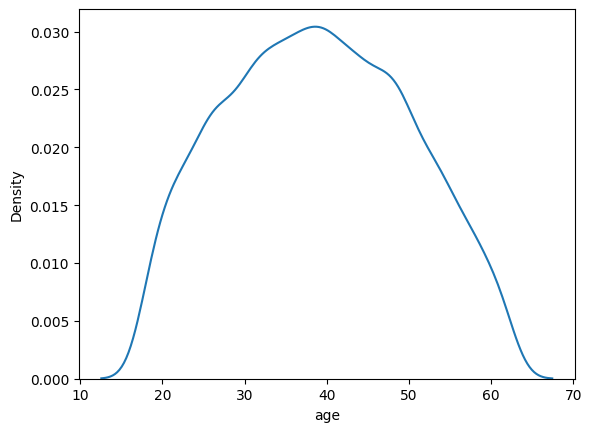

In [19]:
sns.kdeplot(a[a.columns[2]])

<Axes: xlabel='gender', ylabel='count'>

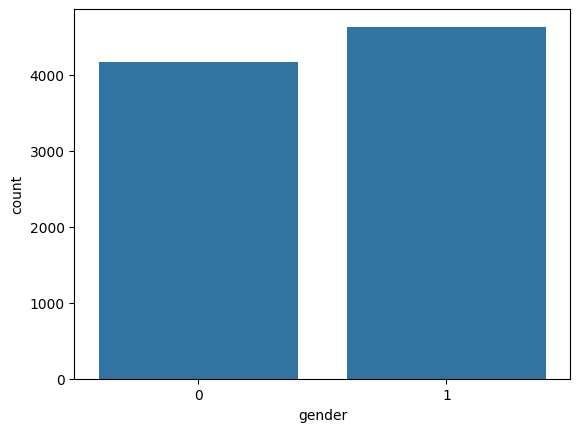

In [20]:
sns.countplot(x=a.columns[4],data=a)

<Axes: >

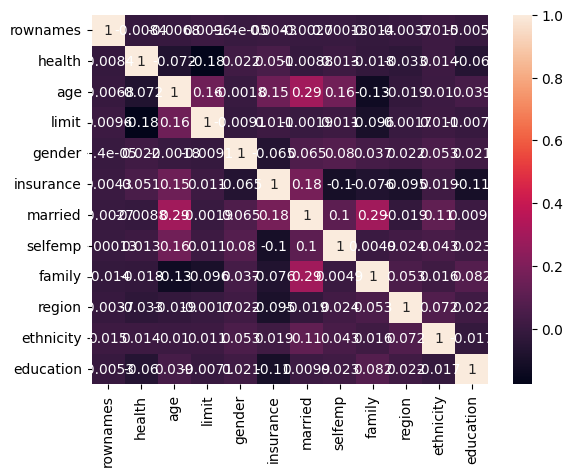

In [21]:
data=a.select_dtypes(include=np.number).corr()
sns.heatmap(data, annot=True)

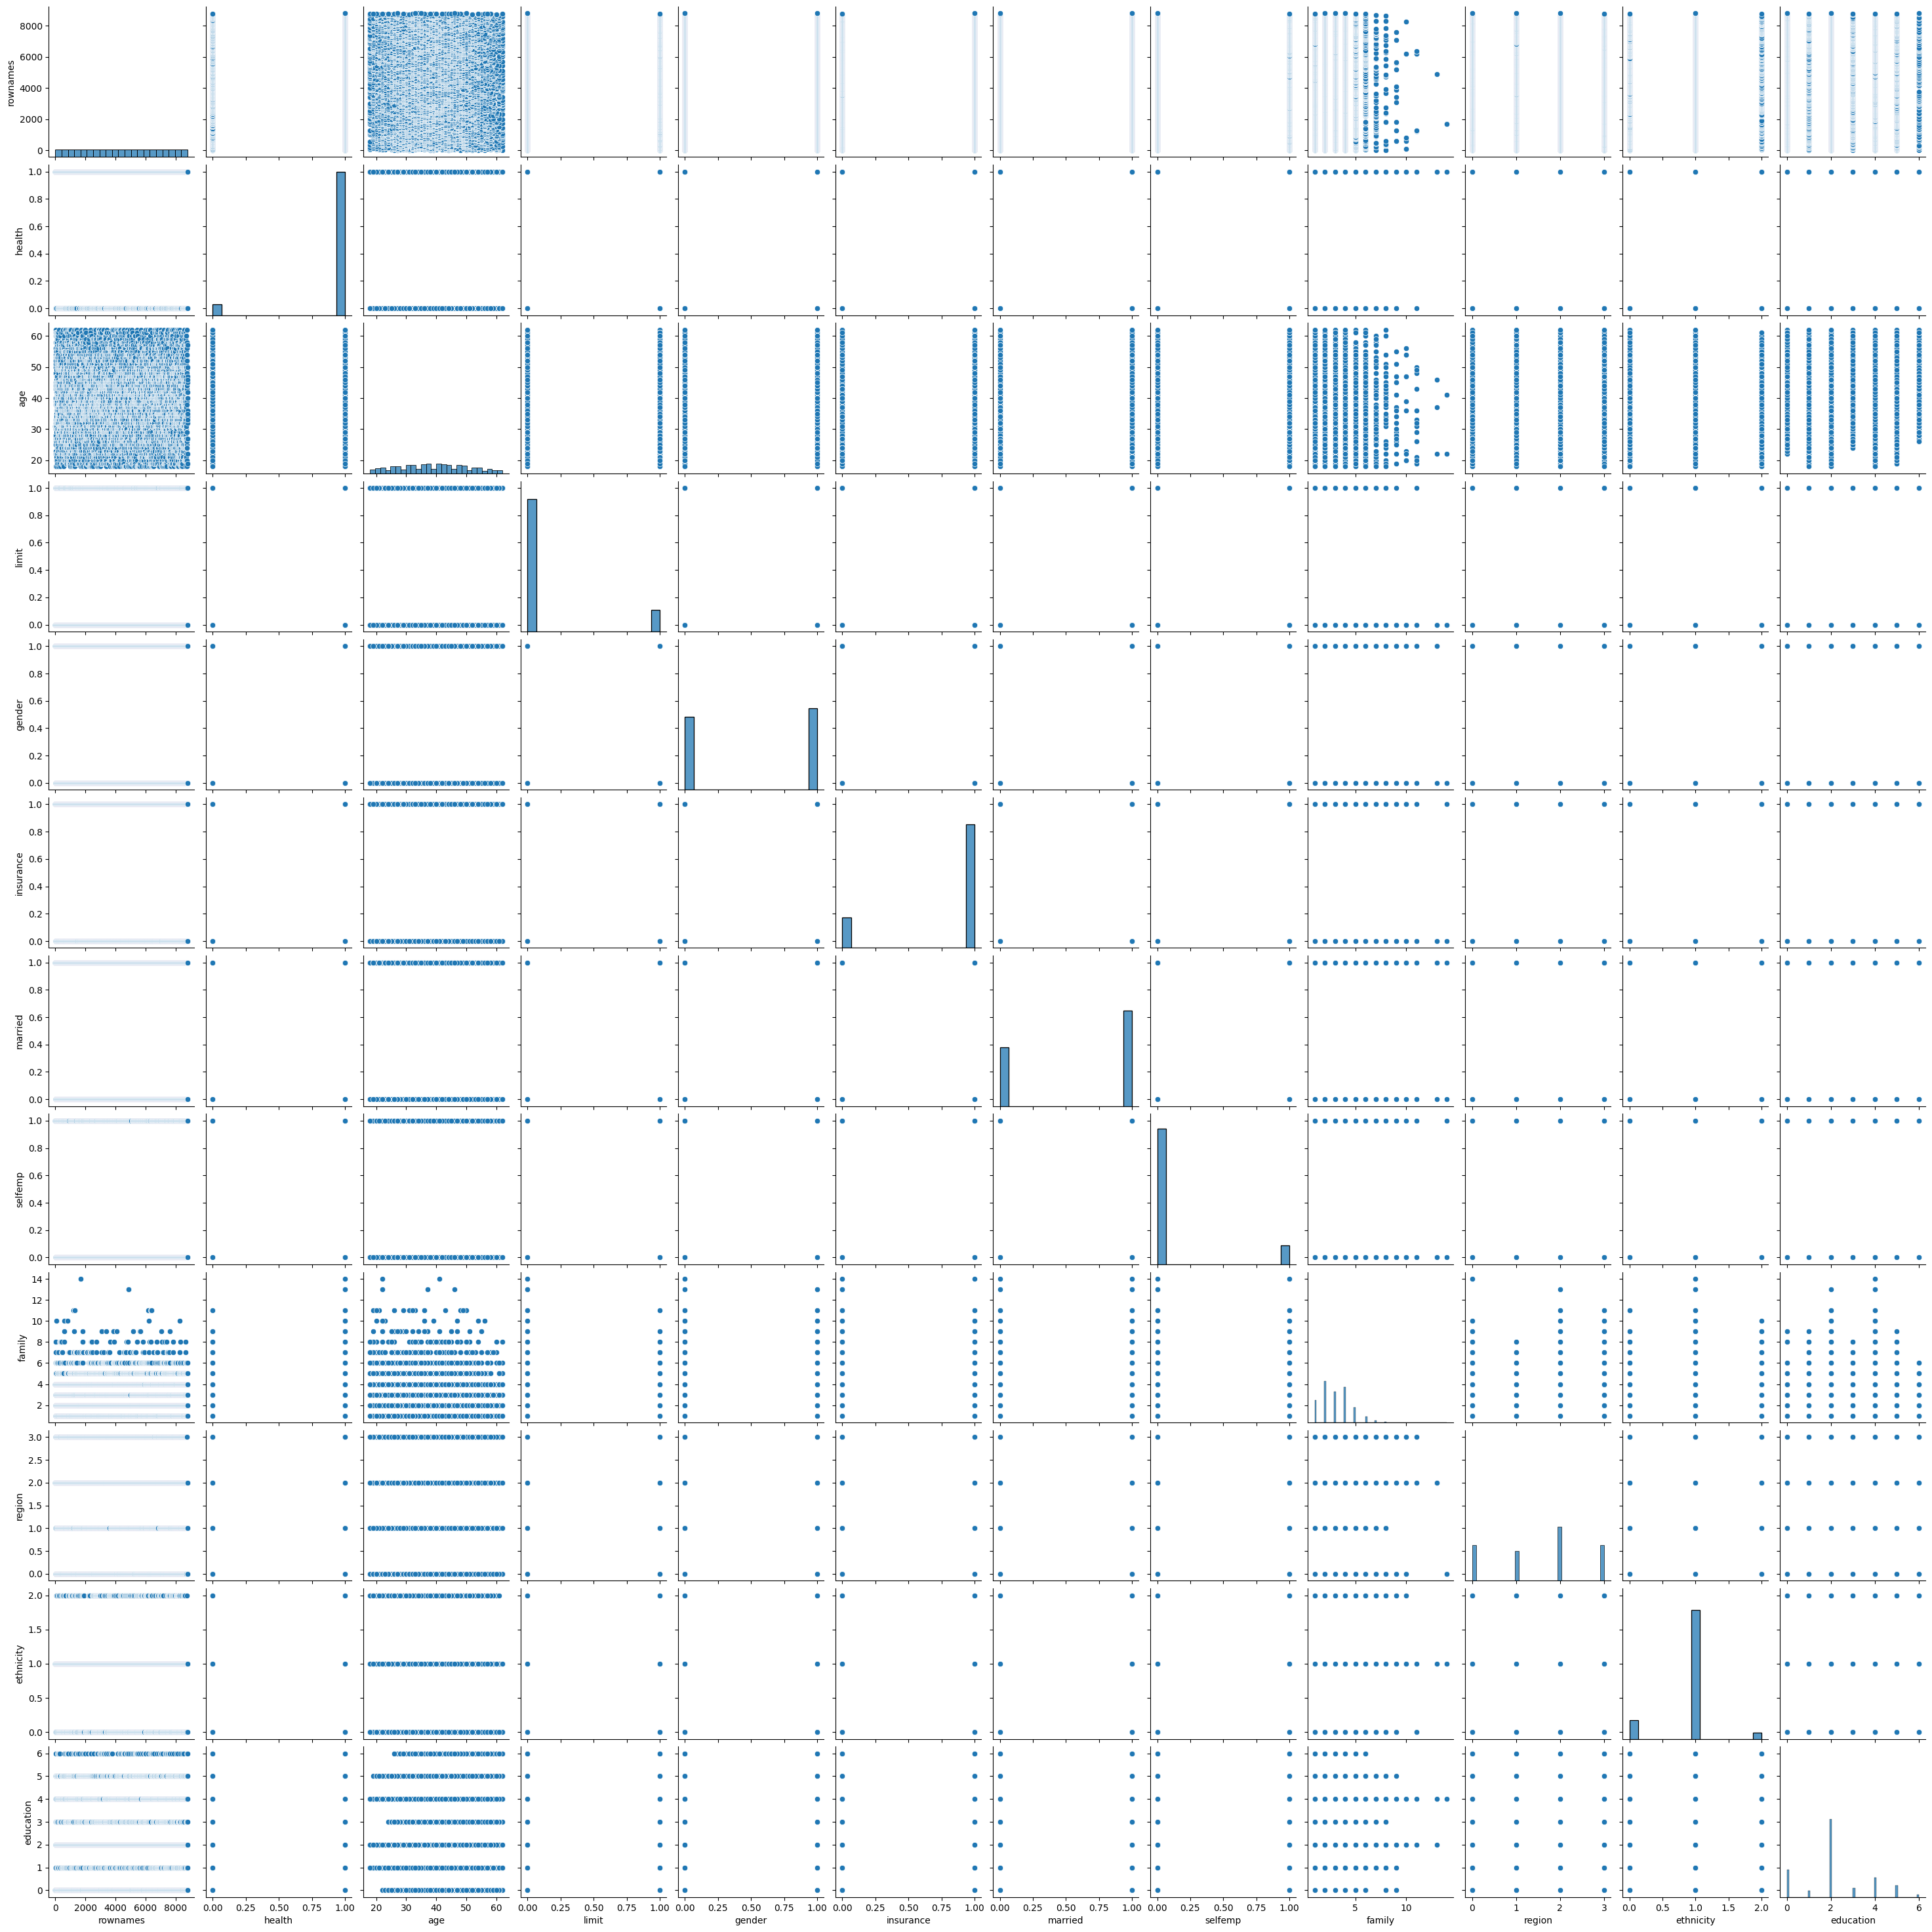

In [22]:
sns.pairplot(data=a)

In [23]:
#data split

y=a[str(target)]
x=a.iloc[:,a.columns != str(target)]


print(x)

      rownames  health  age  limit  gender  married  selfemp  family  region  \
0            1       1   31      0       1        1        1       4       2   
1            2       1   31      0       0        1        0       4       2   
2            3       1   54      0       1        1        0       5       3   
3            4       1   27      0       1        0        0       5       3   
4            5       1   39      0       1        1        0       5       3   
...        ...     ...  ...    ...     ...      ...      ...     ...     ...   
8797      8798       1   46      0       0        1        0       3       1   
8798      8799       1   50      0       1        1        0       3       1   
8799      8800       1   27      0       1        1        0       2       2   
8800      8801       1   27      0       0        1        0       2       2   
8801      8802       1   35      0       1        1        0       4       1   

      ethnicity  education  
0         

In [24]:
print(y)

0       1
1       1
2       1
3       1
4       1
       ..
8797    1
8798    1
8799    1
8800    1
8801    1
Name: insurance, Length: 8802, dtype: int64


In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [26]:
print(x_train)

      rownames  health  age  limit  gender  married  selfemp  family  region  \
1920      1921       1   41      1       1        1        0       5       2   
2936      2937       1   49      0       1        1        1       2       3   
2300      2301       1   37      0       0        1        0       4       1   
8001      8002       1   21      0       0        0        0       3       0   
8612      8613       1   51      1       1        1        0       2       3   
...        ...     ...  ...    ...     ...      ...      ...     ...     ...   
2206      2207       1   29      0       1        1        0       6       2   
1849      1850       1   35      0       1        0        0       2       3   
6917      6918       1   44      0       0        1        0       6       0   
3632      3633       0   47      1       1        0        0       3       0   
6847      6848       1   35      1       0        1        0       4       3   

      ethnicity  education  
1920      

In [27]:
print(y_train)

1920    1
2936    1
2300    1
8001    0
8612    1
       ..
2206    1
1849    0
6917    1
3632    1
6847    1
Name: insurance, Length: 7041, dtype: int64


In [28]:
print(x_test)

      rownames  health  age  limit  gender  married  selfemp  family  region  \
331        332       1   30      0       1        1        0       3       1   
7302      7303       1   27      0       0        1        0       2       2   
8023      8024       1   28      0       1        0        0       2       3   
8282      8283       1   54      0       1        1        0       4       0   
5775      5776       1   29      0       1        0        0       4       0   
...        ...     ...  ...    ...     ...      ...      ...     ...     ...   
2473      2474       1   48      0       1        0        0       2       2   
7141      7142       1   34      0       1        1        0       1       1   
5986      5987       1   46      0       0        1        0       4       2   
4518      4519       1   42      0       0        1        0       4       2   
3783      3784       1   49      0       0        0        0       1       3   

      ethnicity  education  
331       

In [29]:
print(y_test)

331     1
7302    1
8023    1
8282    1
5775    0
       ..
2473    1
7141    1
5986    1
4518    1
3783    1
Name: insurance, Length: 1761, dtype: int64


In [30]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()
model.fit(x_train,y_train)
ypred=model.predict(x_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [31]:
print(ypred)

[1 1 1 ... 1 1 1]


In [37]:
#Print accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,ypred))

0.7984099943214082


In [39]:
#Print confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,ypred))

[[  67  287]
 [  68 1339]]


In [40]:
print(model.predict([[332,1,30,0,1,1,0,3,1,1,3]]))

[1]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [41]:
from sklearn.tree import DecisionTreeClassifier
b=DecisionTreeClassifier()
b.fit(x_train,y_train)
ypred=b.predict(x_test)

In [42]:
print(ypred)

[1 1 1 ... 1 1 1]


In [43]:
#Print accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,ypred))

0.7314026121521863


In [44]:
#Print confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,ypred))

[[ 137  217]
 [ 256 1151]]


In [45]:
print(model.predict([[332,1,30,0,1,1,0,3,1,1,3]]))

[1]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [35]:
from sklearn.ensemble import RandomForestClassifier
b=RandomForestClassifier()
b.fit(x_train,y_train)
ypred=b.predict(x_test)

In [36]:
print(ypred)

[1 1 1 ... 1 1 1]


In [46]:
#Print accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,ypred))

0.7314026121521863


In [47]:
#Print confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,ypred))

[[ 137  217]
 [ 256 1151]]


In [48]:
print(model.predict([[332,1,30,0,1,1,0,3,1,1,3]]))

[1]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
